## INTERN: Shivam Ashok Shukla


# Data Science and Business Analytics Intern at The Sparks Foundation

# TASK1: Prediction using Supervised ML

## Prediction of score of student in exam based number of study hours of student

## Importing Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline


## Dataset Reading and Processing.

In [2]:
#reading the data
Data = pd.read_csv("data (1).csv")

In [3]:
#first five rows of dataset
Data.head()  

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#last five rows of data set
Data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
#printing the dimension(rows and  column) of data set
Data.shape

(25, 2)

In [6]:
#getting info about data
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
correlation = Data.corr()
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

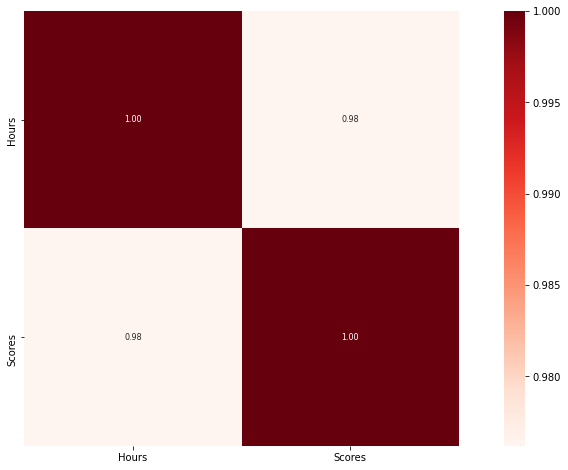

In [8]:
# constructing a heatmap to understand the correaltion
plt.figure(figsize=(16,8))
sns.heatmap(data=correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Reds')

In [9]:
# Splitting the Features and Target
X = Data["Hours"]
y = Data["Scores"]

In [10]:
X.dtype

dtype('float64')

<AxesSubplot:xlabel='Scores', ylabel='Count'>

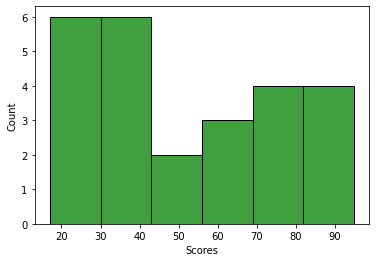

In [11]:
# Checking the value of percentage
sns.histplot(y,color = 'green')

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

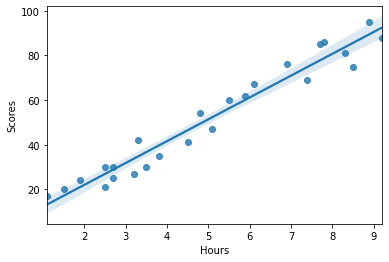

In [12]:
sns.regplot(x=X,y = y)  

In [13]:
#Splitting into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=2)

In [14]:
# reshaping the matrix dimension.
Xx = X_train.to_numpy().reshape(X_train.shape[0],1)
Yy = y_train.to_numpy().reshape(y_train.shape[0],1)
Xx_test = X_test.to_numpy().reshape(X_test.shape[0],1)
Yy_test = y_test.to_numpy().reshape(y_test.shape[0],1)


## Building the Linear Regression Model

In [15]:
#Declartion of Weights (y = Wb + b)
W = np.zeros((1,1))
b = 0

In [16]:
# Size of data
m = X_train.shape[0]

In [17]:
#linear Equation
yhat = np.dot(Xx,W) + b
# Cost Function
J = (1/2*m) * np.sum((yhat - Yy)**2) 


In [18]:
print(W,b)
print(X_train.shape,W.shape)

[[0.]] 0
(20,) (1, 1)


## Model Training Using Batch Gradient Descent

In [19]:
cost = []
iteration = []
alpha = 0.001
for i in range(30):
    yhat = np.dot(Xx,W) + b                    # cost fucntion
    db = 1/m * np.sum(yhat - Yy)               # derative of J w.r.t b
    dw = 1/m * np.sum((yhat - Yy)*Yy)          # derative og J w.r.t W
    W = W - alpha*dw                           # updating the weigths
    b = b - alpha*db
    J = (1/(2*m)) * np.sum((yhat - Yy)**2)     # re calculating the cost after updating the weights
    if i%1==0:                               # printing the cost after every 100 iteration of gradient Descent
        print("cost =",J) 
    cost.append(J)
    iteration.append(i)
        



        

cost = 1669.375
cost = 760.8390952639844
cost = 349.85619789661104
cost = 164.4334440332285
cost = 81.10756126208908
cost = 43.887395313244355
cost = 27.41544389428429
cost = 20.23119168172194
cost = 17.170881762961272
cost = 15.918679704107356
cost = 15.44333199559402
cost = 15.290641271731417
cost = 15.264025404959277
cost = 15.28081134816481
cost = 15.307938553888915
cost = 15.333431685657317
cost = 15.353908128408802
cost = 15.369221119644372
cost = 15.380242359206097
cost = 15.388001139973955
cost = 15.393392348334647
cost = 15.397110772886695
cost = 15.39966648252824
cost = 15.40142233758449
cost = 15.402631629276986
cost = 15.403469076109324
cost = 15.404054279836402
cost = 15.404468704525733
cost = 15.404767654777828
cost = 15.404988593642209


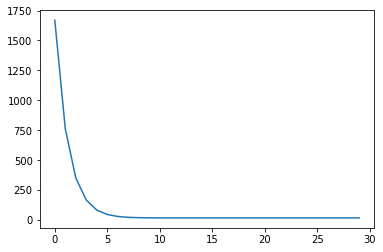

In [20]:
plt.plot(iteration,cost)

In [21]:
# for i in range(25): print(Yy[i][0],yhat[i][0])
def prediction(x):
    yhat = np.dot(x,W) + b
    return yhat

# Finding  the accuracy of Linear Regression Model on test set and train set

In [22]:
Y_prediction_train = prediction(Xx)
Xx_test = X_test.to_numpy().reshape(X_test.shape[0],1)
Y_prediction_test = prediction(Xx_test)

print("train accuracy: {} %".format(100-np.mean(np.abs(Y_prediction_train - Yy)/Yy) * 100))
print("test accuracy: {} %".format(100-np.mean(np.abs(Y_prediction_test - Yy_test)/Yy_test) * 100))

train accuracy: 88.75945646987533 %
test accuracy: 82.44011454146359 %


In [23]:
prediction(9.25)

array([[95.00890803]])

# From the model we can predict that if student studies for 9.25hrs/day  then he/she wil score 95.00% in exam